In [1]:
simpleGrammar = """
sentence => nounPhrase verbPhrase
nounPhrase => Article Adj* noun
Adj* => null | Adj Adj*
verbPhrase => verb nounPhrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 |小小的
"""

In [2]:
anotherGrammar = """
"""

In [3]:
import random

In [4]:
def adj(): return random.choice('蓝色的 | 好看的 | 小小的 '.split('|')).split()[0]

In [6]:
adj()

'好看的'

In [7]:
def adjStart():
    return random.choice([None,adj()+adj()])

In [30]:
adjStart()

In [31]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [50]:
adj_star()

'蓝色的好看的'

In [17]:
adjGrammar = """
Adj* => null | Adj | Adj*
Adj => 蓝色的 | 好看的 | 小小的
"""

In [18]:
def createGrammar(grammarStr,split = '=>', lineSplit = '\n'):
    grammar={}
    for line in grammarStr.split(lineSplit):
        if not line.strip(): continue
        #print(line)
        exp,stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [19]:
grama = createGrammar(simpleGrammar)
grama

{'sentence': [['nounPhrase', 'verbPhrase']],
 'nounPhrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verbPhrase': [['verb', 'nounPhrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [22]:
choice = random.choice
#print(choice)
def generate(gram,target):
    if target not in gram: return target
    expand = [generate(gram,t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expand if e != 'null'])

In [21]:
print(generate(grama,'sentence'))

这个小小的桌子看见一个小猫


In [24]:
choice = random.choice
def ge(gram,tar):
    if tar not in gram: return tar
    expand = [ge(gram,t) for t in choice(gram[tar])]
    #print('expand:',expand)
    return ''.join([e for e in expand if e!='null'])

In [27]:
ge(grama,'sentence')

'这个篮球看见一个女人'

In [28]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 | 俺们
寻找 = 找找 | 想找点
活动 = 乐子 | 玩的
"""

host = """
host = 寒暄 报数 询问 业务相关 结尾
报数 = 我是 数字 号 ，
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ，
人称 = 先生 | 女士  | 小朋友
打招呼 = 你好 | 您好
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [14]:
programming = """
stmt => if_exp | while_exp | assignment
assignment => var = var
if_exp => if ( var ) { /n ... stmt /n }
while_exp => while(var){ /n ... stmt /n }
var => chars number
chars => char | char char
char => student | name | info | database | course
number => 1 | 2 | 3
"""

In [15]:
print(generate(gram = createGrammar(programming,'=>'),target = 'stmt'))

if(course1){
...course2=coursename1
}


In [16]:
gram = createGrammar(programming,'=>')
gram

{'stmt': [['if_exp'], ['while_exp'], ['assignment']],
 'assignment': [['var', '=', 'var']],
 'if_exp': [['if', '(', 'var', ')', '{', '/n', '...', 'stmt', '/n', '}']],
 'while_exp': [['while(var){', '/n', '...', 'stmt', '/n', '}']],
 'var': [['chars', 'number']],
 'chars': [['char'], ['char', 'char']],
 'char': [['student'], ['name'], ['info'], ['database'], ['course']],
 'number': [['1'], ['2'], ['3']]}

In [17]:
fileName = '../article_9k.txt'

In [18]:
content = open(fileName,mode='r',encoding='utf8').read()

In [19]:
print(len(content))
type(content)

33425826


str

In [20]:
import re

In [21]:
def token(string):
    return re.findall('\w+',string)

In [22]:
con = token(content)

In [23]:
type(con)

list

In [24]:
len(con)

89609

In [25]:
import jieba

In [26]:
from collections import Counter

In [27]:
text = ''.join(con)

In [28]:
withJiebaCut = Counter(jieba.cut(text))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wang.kui\AppData\Local\Temp\jieba.cache
Loading model cost 1.195 seconds.
Prefix dict has been built succesfully.


In [29]:
withJiebaCut.most_common()[:100]
#''.join(token())

[('的', 703716),
 ('n', 378454),
 ('在', 263597),
 ('月', 189330),
 ('日', 166267),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123105),
 ('了', 121939),
 ('是', 100914),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83263),
 ('中', 73923),
 ('中国', 71178),
 ('２', 70521),
 ('2017', 69887),
 ('记者', 62149),
 ('二线', 61998),
 ('将', 61421),
 ('与', 58309),
 ('等', 58160),
 ('为', 57018),
 ('5', 54555),
 ('照片', 52271),
 ('4', 51600),
 ('对', 50316),
 ('上', 47451),
 ('也', 47401),
 ('有', 45768),
 ('５', 40857),
 ('说', 39016),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36864),
 ('国际', 35842),
 ('nn', 35470),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29565),
 ('从', 29485),
 ('6', 28973),
 ('都', 28028),
 ('不', 27964),
 ('后', 27392),
 ('当日', 27186),
 ('就', 26685),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('美国', 25485),
 ('3', 25484),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24371),
 ('1', 24125),
 ('这', 24124),
 ('新', 2

In [30]:
articlesClean = text

In [31]:
len(articlesClean)

33336215

In [32]:
def cut(string):return list(jieba.cut(string))

In [33]:
def cutText(text):
    TOKEN = []
    for line in text:
        #print(line)
        TOKEN += cut(line)
    return TOKEN

In [34]:
TOKEN = cutText(articlesClean)

In [35]:
from functools import reduce

In [36]:
from operator import add, mul

In [37]:
reduce(add,[1,2,3,4,5,8])

23

In [38]:
wordsCount = Counter(TOKEN)

In [39]:
wordsCount.most_common(100)

[('的', 713561),
 ('n', 683571),
 ('国', 340445),
 ('1', 318823),
 ('在', 306813),
 ('一', 287295),
 ('中', 280076),
 ('日', 278379),
 ('2', 275952),
 ('新', 272577),
 ('0', 268186),
 ('年', 221905),
 ('月', 205888),
 ('人', 198466),
 ('大', 182608),
 ('社', 179122),
 ('华', 175322),
 ('是', 158493),
 ('和', 147115),
 ('赛', 145923),
 ('有', 144978),
 ('发', 144500),
 ('为', 141563),
 ('了', 139942),
 ('5', 139557),
 ('行', 137683),
 ('7', 135735),
 ('上', 132654),
 ('外', 131119),
 ('不', 125980),
 ('4', 125823),
 ('业', 125430),
 ('会', 123619),
 ('代', 112166),
 ('地', 107688),
 ('球', 103917),
 ('时', 103642),
 ('3', 102841),
 ('者', 102702),
 ('以', 102150),
 ('作', 102091),
 ('家', 100513),
 ('成', 100335),
 ('对', 97773),
 ('6', 97092),
 ('市', 96112),
 ('来', 95755),
 ('生', 95604),
 ('出', 95566),
 ('个', 93876),
 ('这', 92182),
 ('公', 91295),
 ('比', 90066),
 ('动', 89921),
 ('线', 89402),
 ('体', 89027),
 ('开', 88713),
 ('全', 88651),
 ('进', 88523),
 ('１', 88187),
 ('二', 88158),
 ('０', 84945),
 ('多', 84668),
 ('学', 83098

In [40]:
frequences = [f for w,f in wordsCount.most_common(100)]

In [41]:
print(frequences)

[713561, 683571, 340445, 318823, 306813, 287295, 280076, 278379, 275952, 272577, 268186, 221905, 205888, 198466, 182608, 179122, 175322, 158493, 147115, 145923, 144978, 144500, 141563, 139942, 139557, 137683, 135735, 132654, 131119, 125980, 125823, 125430, 123619, 112166, 107688, 103917, 103642, 102841, 102702, 102150, 102091, 100513, 100335, 97773, 97092, 96112, 95755, 95604, 95566, 93876, 92182, 91295, 90066, 89921, 89402, 89027, 88713, 88651, 88523, 88187, 88158, 84945, 84668, 83098, 82589, 82450, 81877, 81209, 80620, 80592, 80169, 79516, 79436, 78994, 78283, 77783, 75984, 74980, 73153, 72681, 72657, 72543, 72357, 71913, 71881, 71760, 71078, 70521, 70298, 69303, 68324, 68028, 67983, 67811, 67605, 67385, 65840, 65820, 65344, 65294]


In [42]:
x = [i for i in range(100)]

In [43]:
import matplotlib.pyplot as plt

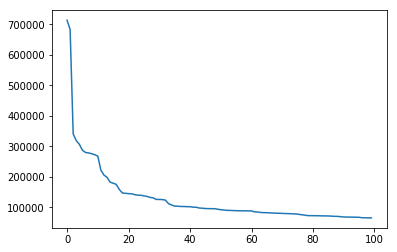

In [44]:
plt.plot(x,frequences)

In [45]:
import numpy as np

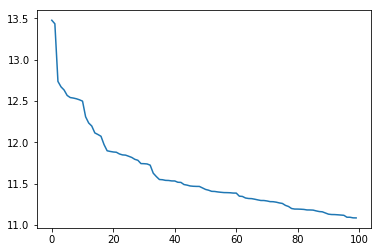

In [46]:
plt.plot(x,np.log(frequences))

In [47]:
def prob_1(work):
    return wordsCount[work]/len(TOKEN)

In [48]:
prob_1('的')

0.02140497953951881

In [50]:
TOKEN[:10]

['此', '外', '自', '本', '周', '6', '月', '1', '2', '日']

In [51]:
TOKEN = [str(t) for t in TOKEN]

In [52]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [53]:
TOKEN_2_GRAM[:10]

['此外', '外自', '自本', '本周', '周6', '6月', '月1', '12', '2日', '日起']

In [54]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [55]:
def prob2(word1,word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [56]:
prob2('我','们')

0.0005994682119411704

In [57]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob2(word,next_)
        sentence_pro *= probability
    return sentence_pro

In [58]:
get_probablity('帮助别人')

2.999740852387762e-08

In [59]:
get_probablity('你好吗')

2.999740852387762e-08

In [60]:
get_probablity('大家好')

2.999740852387762e-08

In [61]:
get_probablity('我们在一起玩游戏')

2.699300361886954e-23

In [62]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]
for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = get_probablity(s1),get_probablity(s2)
    better = s1 if p1 > p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 3.097395619438476e-73
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 3.097395619438476e-73
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.6718456968279815e-37
---- 真是一只好看的小猫 with probility 8.097201568417366e-31
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.158181423407736e-21
---- 今晚火锅去吃我 with probility 3.7651987293140754e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.699300361886954e-23
---- 养乐多绿来一杯 with probility 8.998445181484058e-16
